In [89]:
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import curve_fit

In [2]:
def exponential_pdf(x, lamb):
    return lamb * np.exp(-lamb * x)

In [71]:
a=True
while a:
    dice=[random.randint(1, 6) for _ in range(3)]
    if 6 in dice and sum(dice) - 6 == 9:
        print(dice)
        a=False

[5, 4, 6]


In [ ]:
def roll_dice():
    return [random.randint(1, 6) for _ in range(3)]


In [ ]:
def calculate_winnings(bets, dice):
    bet_total = sum(bets)
    winnings = 0
    
    # Rule: Game over if three sixes
    if dice == [6, 6, 6]:
        #print("Game over! You rolled (6,6,6). You lose everything.")
        return -bet_total, True
    
    # Rule: Check for triples (111,222,333,444,555) --> Lose all bet
    if dice.count(dice[0]) == 3 and dice[0] != 6:
        #print(f"You rolled ({dice[0]},{dice[0]},{dice[0]}). You lose all bet!")
        return -bet_total, False
    
    # Rule: "69" win condition (One 6 + sum of other two is 9)
    if 6 in dice and sum(dice) - 6 == 9:
        #print("Lucky 69! Your bet is multiplied by 30!")
        return bet_total * 10, False
    
    # Normal cases: Check each die
    for i, num in enumerate(dice):
        if num % 2 == 0:  # Even number (2,4,6) doubles the bet on that die
            winnings += bets[i] * 2
        else:  # Odd number (1,3,5) loses the bet
            winnings += 0
    
    return winnings, False



In [ ]:
def play_round(bananas,alpha):
    #print(f"You have {bananas} bananas.")
    
    # Betting strategy: Ask player input (or use AI strategy)
    bets = [max(1, bananas * alpha) for _ in range(3)]  # Example strategy: Bet 2 per dice (if enough bananas)
    #print(f"You bet: {bets} bananas.")
    
    dice = roll_dice()
    #print(f"You rolled: {dice}")
    
    winnings, game_over = calculate_winnings(bets, dice)
    bananas += winnings #- sum(bets)  # Update banana count
    
    #print(f"Winnings this round: {winnings}. New balance: {bananas} bananas.\n")
    
    return bananas, game_over

In [138]:
# Main game loop
percentages=np.linspace(0.01,0.33,11)
lambda_B=[]
lambda_R=[]

Bananaria=[]
Rollaria=[]



for alpha in percentages:
    Ban_num=[]
    Rolls=[]
    for i in range(100000):
        bananas = 10

        count_roll=0
        while bananas > 0:
            count_roll+=1
            bananas, game_over = play_round(bananas,alpha)
            if game_over:
                Ban_num.append(bananas)
                Rolls.append(count_roll)
                break
    


    #Filtering data
    Banarray=np.array(Ban_num)
    Ban_fil=Banarray[Banarray<1000]# When I increase this all lambdas are 1

    #Fit the distribution
    hist_values, bin_edges = np.histogram(Ban_fil, bins=30, density=True)  # Normalize histogram
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Get center points

    # Use curve_fit to estimate lambda
    popt, _ = curve_fit(exponential_pdf, bin_centers, hist_values, p0=[1])
    estimated_lambda = popt[0]

    lambda_B.append(estimated_lambda)
    Bananaria.append(Ban_fil)

    #Filtering data
    Rolls_A=np.array(Rolls)
    Rolls_F=Rolls_A[Rolls_A<500]

    #Fit the distribution
    hist_values, bin_edges = np.histogram(Rolls_F, bins=30, density=True)  # Normalize histogram
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Get center points

    # Use curve_fit to estimate lambda
    popt, _ = curve_fit(exponential_pdf, bin_centers, hist_values, p0=[1])
    estimated_lambda = popt[0]

    lambda_R.append(estimated_lambda)
    Rollaria.append(Rolls_F)





/tmp/ipykernel_620126/2687699774.py:2: RuntimeWarning: overflow encountered in exp
  return lamb * np.exp(-lamb * x)
/tmp/ipykernel_620126/2687699774.py:2: RuntimeWarning: overflow encountered in multiply
  return lamb * np.exp(-lamb * x)
/tmp/ipykernel_620126/2024221102.py:21: RuntimeWarning: overflow encountered in scalar multiply
  return bet_total * 10, False
/tmp/ipykernel_620126/2024221102.py:43: RuntimeWarning: invalid value encountered in scalar add
  bananas += winnings #- sum(bets)  # Update banana count
/tmp/ipykernel_620126/2024221102.py:43: RuntimeWarning: overflow encountered in scalar add
  bananas += winnings #- sum(bets)  # Update banana count
/tmp/ipykernel_620126/2024221102.py:26: RuntimeWarning: overflow encountered in scalar add
  winnings += bets[i] * 2


In [48]:
from numpy.linalg import norm

In [142]:
def min_max_normalize(arr):
    return arr / norm(arr)
    #return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

In [143]:
norm_B=min_max_normalize(1/np.array(lambda_B))
norm_R=min_max_normalize(1/np.array(lambda_R))

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_620126/744828285.py:2: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(percentages*100,norm_R,".",label=f"$\lambda$")


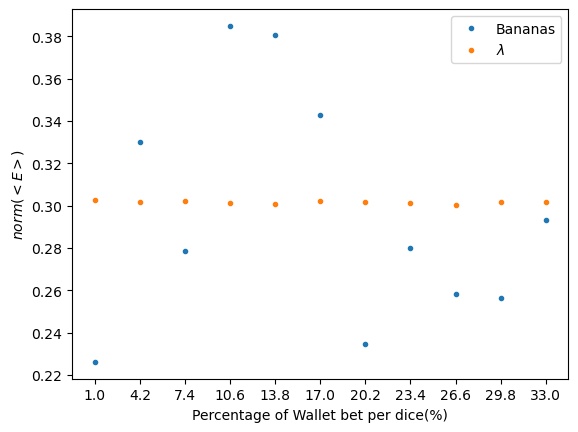

In [144]:
plt.plot(percentages*100,norm_B,".",label="Bananas")
plt.plot(percentages*100,norm_R,".",label=f"$\lambda$")
plt.xticks(percentages*100)
plt.xlabel("Percentage of Wallet bet per dice(%)")
plt.ylabel("$norm(<E>)$")
plt.legend()
plt.show()


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_620126/2584341609.py:4: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x,exponential_pdf(x,i),label=f"a= {a*100:.2f} |"+f" $\lambda$= {i:.2f}")
/tmp/ipykernel_620126/2584341609.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f"$\lambda exp(-\lambda x)$")


Text(0, 0.5, '$\\lambda exp(-\\lambda x)$')

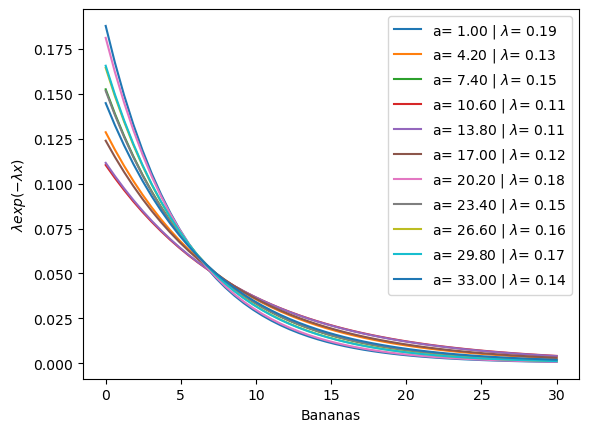

In [145]:
x=np.linspace(0,30)

for i,a  in zip(lambda_B,percentages):
    plt.plot(x,exponential_pdf(x,i),label=f"a= {a*100:.2f} |"+f" $\lambda$= {i:.2f}")
plt.legend()
plt.xlabel("Bananas")
plt.ylabel(f"$\lambda exp(-\lambda x)$")

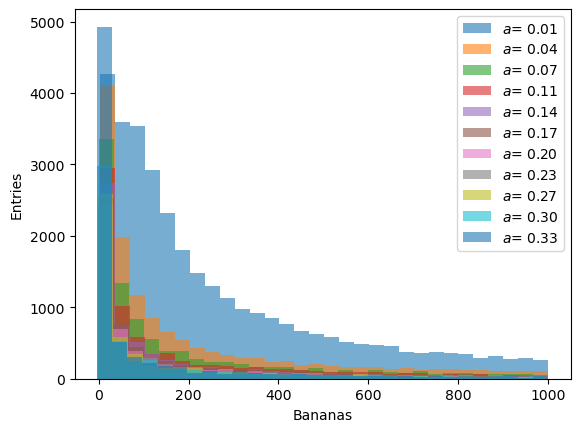

In [146]:
for histo,al in zip(Bananaria,percentages):
    plt.hist(histo,bins=30,alpha=0.6,label=f"$a$= {al:.2f}")
plt.legend()
plt.xlabel("Bananas")
plt.ylabel("Entries")
plt.show()

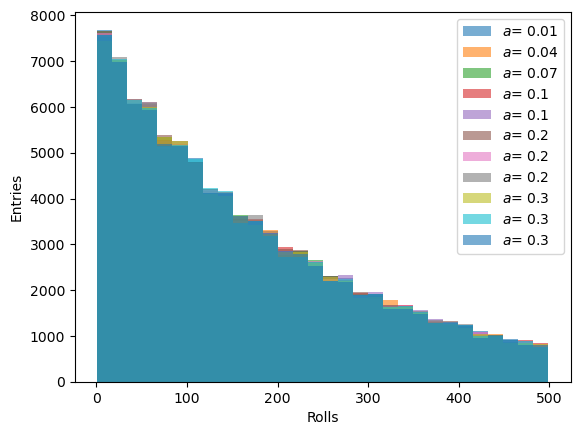

In [147]:
for histo,al in zip(Rollaria,percentages):
    plt.hist(histo,bins=30,alpha=0.6,label=f"$a$= {al:.1}")
plt.legend()
plt.xlabel("Rolls")
plt.ylabel("Entries")
plt.show()